In [2]:
import pandas as pd
import seaborn as sns


In [3]:
taxi1 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-nurdaulet/3_logs.csv')

In [4]:
taxi = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-m-nurdaulet/3_user_data.csv')

In [ ]:
# Generates summary statistics for the taxi data, 
# including count, mean, min, max, and quartiles.

In [5]:
taxi.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [ ]:
# Returns the dimensions (rows, columns) of the taxi DataFrame.

In [6]:
taxi.shape

(2954, 3)

In [ ]:
# Returns the number of unique values in each column of the taxi DataFrame.


In [7]:
taxi.nunique()

client     2954
premium       2
age          50
dtype: int64

In [ ]:
# Computes the number of unique values in the 'platform' column of the taxi1 DataFrame.


In [8]:
taxi1.agg({'platform': pd.Series.nunique}) 

platform    3
dtype: int64

In [9]:
taxi1

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [ ]:
# Filters rows in the taxi1 DataFrame where 'success' is True, 
# and selects only the 'success' and 'client' columns into a new DataFrame named 'new_logs'.


In [10]:
new_logs= taxi1[['success','client']].query("success==True")

In [ ]:
# Groups the 'taxi1' DataFrame by 'client' where 'success' is True,
# counts the occurrences of success for each client,
# sorts the result in descending order based on the count of successes,
# and stores the result in a DataFrame named 'success_clients'.


In [11]:
success_clients=  taxi1.query('success == True')\
.groupby('client', as_index =False)\
.agg({ 'success' : 'count'})\
.sort_values('success', ascending = False)

In [12]:
success_clients.head(10)

,client,success
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
2345,82563,41
2231,78349,41
1020,36165,41
810,28719,41
1826,64064,40


In [ ]:
# Groups the 'taxi1' DataFrame by 'platform' where 'success' is True,
# counts the occurrences of success for each platform,
# sorts the result in descending order based on the count of successes,
# and stores the result in a DataFrame named 'best_platform'.


In [13]:
best_platform=  taxi1.query('success == True')\
.groupby('platform', as_index =False)\
.agg({ 'success' : 'count'})\
.sort_values('success', ascending = False)

In [14]:
best_platform

,platform,success
1,phone,2019
0,computer,1090
2,tablet,180


In [ ]:
# Joins the 'taxi' DataFrame with the 'taxi1' DataFrame based on the 'client' column,
# using an inner join, and stores the result in a new DataFrame named 'joined_taxi'.


In [15]:
joined_taxi=taxi.merge(taxi1, on='client', how='inner')

In [ ]:
# Filters rows in the 'joined_taxi' DataFrame where 'premium' is True,
# groups the result by 'platform',
# counts the occurrences of success for each platform,
# sorts the result in descending order based on the count of successes,
# and stores the result in a DataFrame named 'best_platform_premium'.


In [16]:
best_platform_premium=  joined_taxi.query('premium == True')\
.groupby('platform', as_index =False)\
.agg({ 'success' : 'count'})\
.sort_values('success', ascending = False)

In [17]:
joined_taxi

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [18]:
best_platform_premium

,platform,success
1,phone,246
0,computer,150
2,tablet,24


In [ ]:
# Plots the distribution of ages for non-premium customers in the 'joined_taxi' DataFrame using seaborn.
# Plots the distribution of ages for premium customers in the 'joined_taxi' DataFrame using seaborn.


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


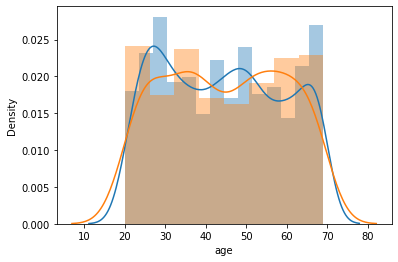

In [19]:
sns.distplot(joined_taxi.query('premium==False').age, kde= True)
sns.distplot(joined_taxi.query('premium==True').age, kde= True)



In [ ]:
# Filters rows in the 'joined_taxi' DataFrame where 'success' is True,
# groups the result by 'client',
# counts the occurrences of clients for each client,
# sorts the result in descending order based on the count of clients,
# and stores the result in a DataFrame named 'x'.


In [20]:
x=joined_taxi.query('success == True')\
.groupby('client', as_index =False)\
.agg({ 'client' : 'count'})\
.sort_values('client', ascending = False)

In [21]:
x

,client
250,41
737,41
588,41
1280,41
1279,41
...,...
702,1
701,1
700,1
699,1


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


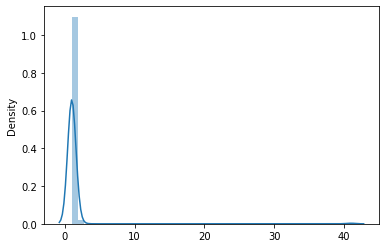

In [22]:
sns.distplot(x)

In [ ]:
# Filters rows in the 'joined_taxi' DataFrame where 'platform' is 'computer' and 'success' is True,
# groups the result by 'age',
# counts the occurrences of clients for each age,
# sorts the result in descending order based on the count of clients,
# and stores the result in a DataFrame named 'age_platform'.


In [26]:
age_platform = joined_taxi.query('platform ==computer' and 'success== True') \
    .groupby('age', as_index=False) \
    .agg({'client': 'count'}) \
    .sort_values('client', ascending=False)


In [28]:
age_platform

,age,client
8,28,120
5,25,93
48,68,92
32,52,90
29,49,86
49,69,81
4,24,79
45,65,79
12,32,77
38,58,55


In [ ]:
# Plots the distribution of ages from the 'age_platform' DataFrame using seaborn.


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


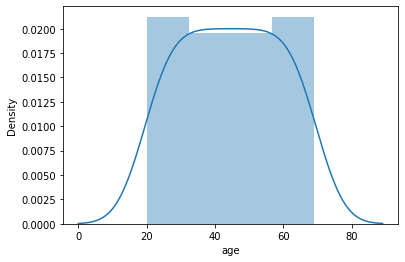

In [29]:
sns.distplot(age_platform.age) 


In [ ]:
plt.figure(figsize=(12, 8))